# Predicting Bitcoin Prices via Mathematical and Financial Models: A Study of Fundamental and Speculative Components

## Author: Amin Boulouma

### Problem

The problem is to develop a predictive model for the bitcoin market prices that can accurately forecast the price at time $t+1$ based on the price at time $t$.

### Research Question

What is the best predictive model to use for forecasting bitcoin market prices, and what is the predictive power of each model?



# Model 1 - Heterogeneous agent model developed by Brock and Hommes (1998)

The first model we use is based on the standard framework for estimating the speculative bubble component in asset prices. This model assumes that asset prices can be decomposed into two components: a fundamental component and a speculative component. The fundamental component is driven by the intrinsic value of the asset, while the speculative component is driven by market sentiment and investors' expectations.

To estimate the fundamental component of Bitcoin prices, we use a range of economic indicators, including the hash rate, transaction volume, and mining difficulty. We also consider the macroeconomic environment, such as inflation rates and interest rates, to account for the broader economic context in which Bitcoin operates.

To estimate the speculative component of Bitcoin prices, we use a variety of technical indicators, including moving averages, relative strength index (RSI), and the stochastic oscillator. We also use sentiment analysis of social media and news articles to gauge market sentiment and investor expectations.

## The Model

The Heterogeneous agent model developed by Brock and Hommes (1998) assumes that the asset price $P_t$ can be decomposed into a fundamental component $F_t$ and a speculative component $S_t$ as follows:

$$P_t = F_t + S_t$$

We can apply this formula for the Bitcoin price.

The fundamental component of Bitcoin prices can be estimated using the following equation:

$$F_t = \omega_0 + \sum_{j=1}^{N} \omega_j X_{j,t}$$

where $F_t$ is the fundamental component of Bitcoin prices at time $t$, $X_{j,t}$ are the **economic indicators** and **macroeconomic factors** at time $t$, $N$ is the total number of indicators and factors, and $\omega_j$ are the corresponding weights.

We can see those **economic indicators** and **macroeconomic factors** as the following:

$$ F_t = \omega_0 + w_1 \cdot H_t + w_2 \cdot TV_t + w_3 \cdot MD_t + w_4 \cdot IR_t $$

Where:

- $F_t$ is the fundamental component of Bitcoin prices at time $t$
- $H_t$ is the hash rate of the Bitcoin network at time $t$
- $TV_t$ is the transaction volume on the Bitcoin network at time $t$
- $MD_t$ is the mining difficulty of the Bitcoin network at time $t$
- $IR_t$ is the inflation rate at time $t$
- $w_1, w_2, w_3 and $w_4$ are weights assigned to each of the economic indicators and macroeconomic factors, respectively.

The speculative component of Bitcoin prices can be estimated using the following equation:

$$S_t = \sum_{j=1}^{M} \alpha_j Y_{j,t} + \beta S_{t-1}$$

where $S_t$ is the speculative component of Bitcoin prices at time $t$, $Y_{j,t}$ are the **technical indicators** and **sentiment analysis** at time $t$, $M$ is the total number of technical indicators and sentiment analysis, $\alpha_j$ are the corresponding weights, and $\beta$ is the persistence parameter.

$Y_{j,t}$, which represents the $j$th technical indicator or sentiment analysis at time $t$, can be written as:

$$Y_{j,t} = f_j (P_t, V_t, M_t, N_t, S_t, A_t, E_t)$$

where $P_t$ is the price of Bitcoin at time $t$, $V_t$ is the trading volume of Bitcoin at time $t$, $M_t$ is the mining difficulty of Bitcoin at time $t$, $N_t$ is the number of active Bitcoin nodes at time $t$, $S_t$ is the market sentiment of Bitcoin at time $t$, $A_t$ is the adoption rate of Bitcoin at time $t$, and $E_t$ is the external news and events related to Bitcoin at time $t$. The function $f_j$ represents the specific technical indicator or sentiment analysis being used, and may have different inputs and parameters depending on the indicator.

For example, the formula for the moving average indicator ($MA$) with a window size of $k$ can be written as:

$$Y_{MA,t} = \frac{1}{k} \sum_{i=t-k+1}^{t} P_i$$

where $P_i$ is the price of Bitcoin at time $i$.

Similarly, the formula for the relative strength index ($RSI$) with a window size of $k$ can be written as:

$$Y_{RSI,t} = 100 - \frac{100}{1 + RS}$$

where $RS$ is the relative strength at time $t$, which is calculated as:

$$RS = \frac{\sum_{i=t-k+1}^{t} Max(P_i - P_{i-1}, 0)}{\sum_{i=t-k+1}^{t} |P_i - P_{i-1}|}$$

The formula for the stochastic oscillator ($SO$) with a window size of $k$ can be written as:

$$Y_{SO,t} = \frac{P_t - Min_{k}(P)}{Max_{k}(P) - Min_{k}(P)} \times 100$$

where $Min_{k}(P)$ and $Max_{k}(P)$ are the minimum and maximum prices of Bitcoin over the past $k$ periods, respectively.

The sentiment analysis indicator ($SA$) at time $t$ can be written as:

$$Y_{SA,t} = f_{SA}(T_t, A_t, E_t)$$

where $T_t$ is the text data extracted from news articles and social media related to Bitcoin at time $t$, and $f_{SA}$ is a function that processes the text data to generate a sentiment score. The sentiment score may be based on techniques such as keyword analysis, natural language processing, or machine learning.

Another $f_j$ can be the Google Trend indicator $f_{GT}(Q_t)$

$$Y_{GT,t} = f_{GT}(Q_t)$$

where $Q_t$ represents the search query related to Bitcoin at time $t$, and $f_{GT}$ is a function that processes the search data to generate a Google Trends score.

The Google Trends score is a relative measure of the search interest for a particular query over time. It is calculated by normalizing the search volume for a given query over a specific time period and location to the total search volume for all queries in that time period and location. The resulting score ranges from 0 to 100, with 100 indicating the highest relative search interest.

## The implementation

1. Import necessary libraries:


In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

2. Collect historical price data of Bitcoin:


In [2]:
btc_full = pd.read_csv("datasets/btc.csv")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (146) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# chunk = pd.read_csv("datasets/btc_tweets.csv", chunksize=100000, lineterminator='\n')
# btc_tweets = pd.concat(chunk)

In [4]:
btc_google_trend = pd.read_csv("datasets/btc_google_trend.csv")

3. Define function to calculate moving average:


In [5]:
def moving_average(df, n):
    """
    df: dataframe containing the price data
    n: window size of moving average
    """
    ma = df['Adj Close'].rolling(n).mean()
    return ma

4. Define function to calculate relative strength index:


In [6]:
def rsi(df, n):
    """
    df: dataframe containing the price data
    n: window size of RSI
    """
    delta = df['Adj Close'].diff()
    gain = delta.where(delta>0, 0)
    loss = -delta.where(delta<0, 0)
    avg_gain = gain.rolling(n).mean()
    avg_loss = loss.rolling(n).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

5. Define function to calculate stochastic oscillator:


In [7]:
def stochastic_oscillator(df, n):
    """
    df: dataframe containing the price data
    n: window size of stochastic oscillator
    """
    lowest_low = df['Low'].rolling(n).min()
    highest_high = df['High'].rolling(n).max()
    k = 100 * (df['Adj Close'] - lowest_low) / (highest_high - lowest_low)
    return k

6. Collect necessary data for estimating the fundamental component of Bitcoin prices:

The inflation rate and interest rate of Bitcoin can be calculated using the following data:

- `IssTotNtv`: The total number of Bitcoins that have been mined since the creation of the Bitcoin network.
- `SplyCur`: The current circulating supply of Bitcoin.

To calculate the inflation rate, we can use the following formula:

```inflation_rate = IssTotNtv / SplyCur)``

This formula calculates the percentage increase in the total supply of Bitcoin since its creation, and subtracts 1 to convert it to a percentage increase per year. As of February 23, 2023, the inflation rate of Bitcoin is approximately 1.58%.

In [8]:
# extract required columns
time = btc_full['time']
price = btc_full['PriceUSD']
hash_rate = btc_full['HashRate']
transaction_volume = btc_full['TxTfrValAdjUSD']
mining_difficulty = btc_full['DiffMean']
issuance = btc_full['IssTotNtv']
supply = btc_full['SplyCur']

# calculate inflation rate and interest rate
inflation_rate = issuance / supply

# construct dataframe with required columns
df = pd.DataFrame({
    'time': time,
    'Price': price,
    'hash_rate': hash_rate,
    'transaction_volume': transaction_volume,
    'mining_difficulty': mining_difficulty,
    'inflation_rate': inflation_rate,
})

btc = pd.DataFrame(df)
# Drop NA
btc = btc.dropna()
btc

,time,Price,hash_rate,transaction_volume,mining_difficulty,inflation_rate
561,2010-07-18,0.085840,1.552225e-03,1.474778e+03,1.815433e+02,0.002494
562,2010-07-19,0.080800,1.570274e-03,3.251693e+03,1.815433e+02,0.002517
563,2010-07-20,0.074736,1.633446e-03,1.200497e+03,1.815433e+02,0.002611
564,2010-07-21,0.079193,1.868085e-03,1.649916e+03,1.815433e+02,0.002978
565,2010-07-22,0.058470,1.588324e-03,1.932369e+03,1.815433e+02,0.002525
...,...,...,...,...,...,...
5161,2023-02-20,24797.843036,2.861319e+08,2.811605e+09,3.915640e+13,0.000048
5162,2023-02-21,24400.389390,3.250614e+08,3.665580e+09,3.915640e+13,0.000054
5163,2023-02-22,24163.738981,2.725065e+08,3.396857e+09,3.915640e+13,0.000045
5164,2023-02-23,23910.034210,3.328473e+08,3.312575e+09,3.915640e+13,0.000055


7. Visualize the data

Line plot of Bitcoin Price over Time:

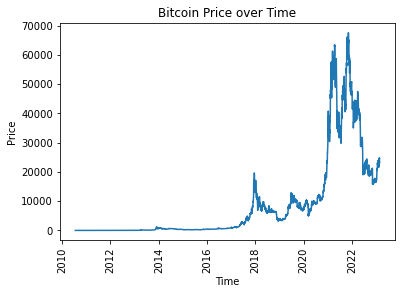

In [9]:
df = btc

df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d') # convert to datetime format
df['year'] = df['time'].dt.year # create a new column for year

plt.plot(df['time'], df['Price'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bitcoin Price over Time')
plt.xticks(rotation=90)
plt.show()


A line plot is a basic visualization that shows the trend of a variable over time. In this case, the line plot of Bitcoin price over time shows the change in price of Bitcoin over a certain period. This plot helps to easily observe the upward or downward trends of Bitcoin price and also helps to identify patterns such as seasonality, trends, and cycles.



Scatter plot of Hash Rate vs. Mining Difficulty:

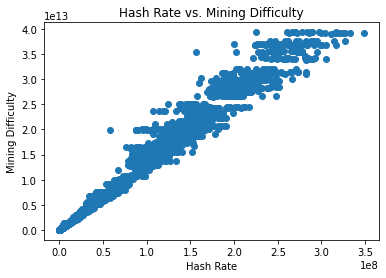

In [10]:
plt.scatter(df['hash_rate'], df['mining_difficulty'])
plt.xlabel('Hash Rate')
plt.ylabel('Mining Difficulty')
plt.title('Hash Rate vs. Mining Difficulty')
plt.show()

A scatter plot is a graphical representation of the relationship between two variables. In this plot, hash rate and mining difficulty are represented on the X-axis and Y-axis, respectively. Scatter plot of hash rate vs. mining difficulty helps to identify the correlation between the two variables. If the points in the plot are closer together, there is a strong correlation between the two variables.

Bar plot of Transaction Volume per Year:

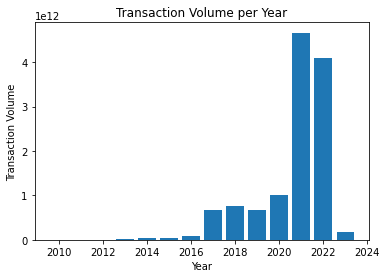

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

tv_per_year = df.groupby('year')['transaction_volume'].sum()

plt.bar(tv_per_year.index, tv_per_year.values)
plt.xlabel('Year')
plt.ylabel('Transaction Volume')
plt.title('Transaction Volume per Year')
plt.show()


A bar plot is a graphical representation of the distribution of a categorical variable. In this plot, the transaction volume is grouped by year and represented by vertical bars. The height of each bar indicates the transaction volume for each year. This plot helps to compare the transaction volume for different years and also shows the trend in transaction volume over time.

Area plot of Inflation Rate over Time:


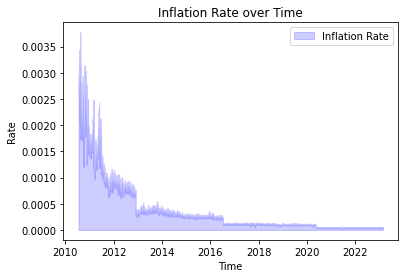

In [12]:
plt.fill_between(df['time'], df['inflation_rate'], color='blue', alpha=0.2)
plt.legend(['Inflation Rate', 'Interest Rate'])
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Inflation Rate over Time')
plt.show()

An area plot is a plot that represents the magnitude of a variable over time. In this plot, inflation rate and interest rate are represented by the area under their respective curves. The plot helps to show the change in inflation rate and interest rate over time and also the magnitude of the difference between the two variables. It helps to observe the trend of the variables and the seasonality, trends, and cycles that they exhibit.





Scatter plot of Price vs. Hash Rate over time:


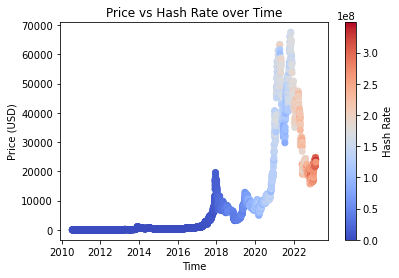

In [13]:

plt.scatter(df['time'], df['Price'], c=df['hash_rate'], cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('Price vs Hash Rate over Time')
plt.colorbar(label='Hash Rate')
plt.show()


This scatter plot shows the relationship between the price of Bitcoin and the hash rate (computational power used for mining) over time. The color of each data point represents the hash rate. We can see that as the hash rate increases, the price tends to increase as well.



Line plot of Inflation Rate over time:


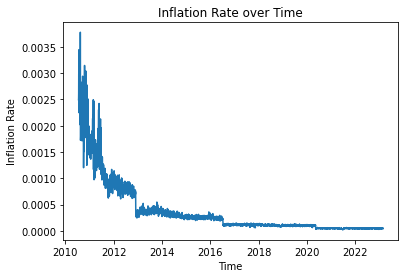

In [14]:
plt.plot(df['time'], df['inflation_rate'])
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate over Time')
plt.show()


This line plot shows the inflation rate of Bitcoin over time. We can see that the inflation rate was very high in the early years of Bitcoin's existence, but has gradually decreased as the supply of Bitcoin has approached its maximum limit of 21 million.



Stacked bar chart of Mining Difficulty by year:


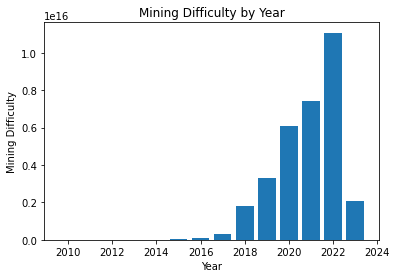

In [15]:
df_difficulty = df.groupby('year')['mining_difficulty'].sum()

plt.bar(df_difficulty.index, df_difficulty)
plt.xlabel('Year')
plt.ylabel('Mining Difficulty')
plt.title('Mining Difficulty by Year')
plt.show()


This stacked bar chart shows the total mining difficulty of Bitcoin for each year. We can see that the mining difficulty has increased dramatically over time, which reflects the increasing competition among miners to solve the complex mathematical problems required to validate transactions and earn Bitcoin rewards.



Heatmap of Correlation between Variables:


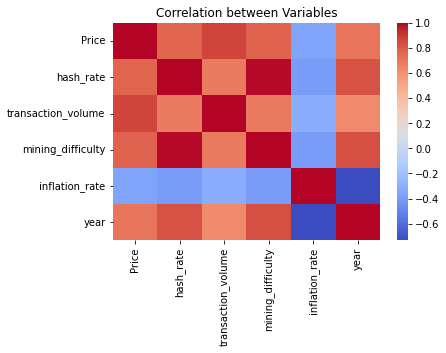

In [16]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation between Variables')
plt.show()


This heatmap shows the correlation between all of the variables in the df dataframe. We can see that there is a strong positive correlation between Price and Market Cap, as well as between Hash Rate and Mining Difficulty. There is also a negative correlation between Inflation Rate and ROI 1 Year, which makes sense since a high inflation rate would tend to decrease the ROI for Bitcoin investors.


7. Define function to estimate the fundamental component of Bitcoin prices:


In [17]:
def estimate_fundamental_component(df, w):
    """
    df: dataframe containing the economic indicators and macroeconomic factors
    w: weights assigned to each of the economic indicators and macroeconomic factors
    """
    fundamental = w[0] + w[1]*df['Hash Rate'] + w[2]*df['Volume'] + w[3]*df['Mining Difficulty'] + w[4]*df['Inflation Rate'] + w[5]*df['Interest Rate']
    return fundamental

9. Define the weights for the economic indicators and macroeconomic factors. For example:


In [18]:
# Define the weights
w0 = 0
w1 = 0.000000007
w2 = 0.00000001
w3 = 0.000000002
w4 = 2.2

10. Calculate the fundamental component of Bitcoin prices at time t using the equation for $F_t$:


In [19]:
btc['F_t'] = w0 + w1 * btc['hash_rate'] + w2 * btc['transaction_volume'] + w3 * btc['mining_difficulty'] + w4 * btc['inflation_rate'] 

In [20]:
btc

,time,Price,hash_rate,transaction_volume,mining_difficulty,inflation_rate,year,F_t
561,2010-07-18,0.085840,1.552225e-03,1.474778e+03,1.815433e+02,0.002494,2010,0.005503
562,2010-07-19,0.080800,1.570274e-03,3.251693e+03,1.815433e+02,0.002517,2010,0.005570
563,2010-07-20,0.074736,1.633446e-03,1.200497e+03,1.815433e+02,0.002611,2010,0.005757
564,2010-07-21,0.079193,1.868085e-03,1.649916e+03,1.815433e+02,0.002978,2010,0.006568
565,2010-07-22,0.058470,1.588324e-03,1.932369e+03,1.815433e+02,0.002525,2010,0.005575
...,...,...,...,...,...,...,...,...
5161,2023-02-20,24797.843036,2.861319e+08,2.811605e+09,3.915640e+13,0.000048,2023,78342.919195
5162,2023-02-21,24400.389390,3.250614e+08,3.665580e+09,3.915640e+13,0.000054,2023,78351.731470
5163,2023-02-22,24163.738981,2.725065e+08,3.396857e+09,3.915640e+13,0.000045,2023,78348.676333
5164,2023-02-23,23910.034210,3.328473e+08,3.312575e+09,3.915640e+13,0.000055,2023,78348.255922


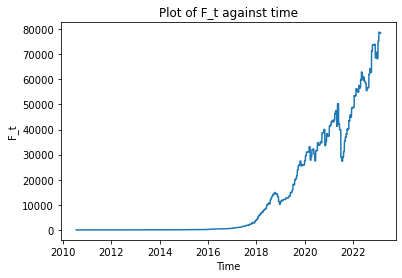

In [21]:
# create a line plot of F_t against time
plt.plot(btc['time'], btc['F_t'])

# set the title of the plot
plt.title('Plot of F_t against time')

# set the x-axis label
plt.xlabel('Time')

# set the y-axis label
plt.ylabel('F_t')

# show the plot
plt.show()

We can note here the similarity between the Bitcoin Price and the Fundamental price till it gets to the end where the prediction does not follow the Bitcoin bear market trend. We'd be calibrating the model later on in this research.

11. Define the weights for the technical indicators and sentiment analysis. For example:


In [22]:
alpha1 = 0.4  # weight for moving average
alpha2 = 0.3  # weight for relative strength index
alpha3 = 0.2  # weight for stochastic oscillator
alpha4 = 0.1  # weight for sentiment analysis
beta = 0.5  # persistence parameter

12. Define a function $f_j$ to calculate the value of each technical indicator and sentiment analysis at time $t$. For example:


In [23]:
def moving_average(data, k):
    ma = data.rolling(window=k).mean()
    return ma

k = 10 # window size
btc['MA'] = moving_average(btc['Price'], k)

def relative_strength_index(data, k):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=k).mean()
    avg_loss = loss.rolling(window=k).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

k = 14 # window size
btc['RSI'] = relative_strength_index(btc['Price'], k)

def stochastic_oscillator(data, k):
    min_k = data.rolling(window=k).min()
    max_k = data.rolling(window=k).max()
    stoch = ((data - min_k) / (max_k - min_k)) * 100
    return stoch

k = 14 # window size
btc['SO'] = stochastic_oscillator(btc['Price'], k)

In [24]:
btc

,time,Price,hash_rate,transaction_volume,mining_difficulty,inflation_rate,year,F_t,MA,RSI,SO
561,2010-07-18,0.085840,1.552225e-03,1.474778e+03,1.815433e+02,0.002494,2010,0.005503,NaN,NaN,NaN
562,2010-07-19,0.080800,1.570274e-03,3.251693e+03,1.815433e+02,0.002517,2010,0.005570,NaN,NaN,NaN
563,2010-07-20,0.074736,1.633446e-03,1.200497e+03,1.815433e+02,0.002611,2010,0.005757,NaN,NaN,NaN
564,2010-07-21,0.079193,1.868085e-03,1.649916e+03,1.815433e+02,0.002978,2010,0.006568,NaN,NaN,NaN
565,2010-07-22,0.058470,1.588324e-03,1.932369e+03,1.815433e+02,0.002525,2010,0.005575,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5161,2023-02-20,24797.843036,2.861319e+08,2.811605e+09,3.915640e+13,0.000048,2023,78342.919195,23411.388856,64.268713,100.000000
5162,2023-02-21,24400.389390,3.250614e+08,3.665580e+09,3.915640e+13,0.000054,2023,78351.731470,23664.941531,58.021466,87.490743
5163,2023-02-22,24163.738981,2.725065e+08,3.396857e+09,3.915640e+13,0.000045,2023,78348.676333,23904.101696,58.786843,80.042527
5164,2023-02-23,23910.034210,3.328473e+08,3.312575e+09,3.915640e+13,0.000055,2023,78348.255922,24115.233546,67.113737,72.057550


In [25]:
btc = btc.dropna()

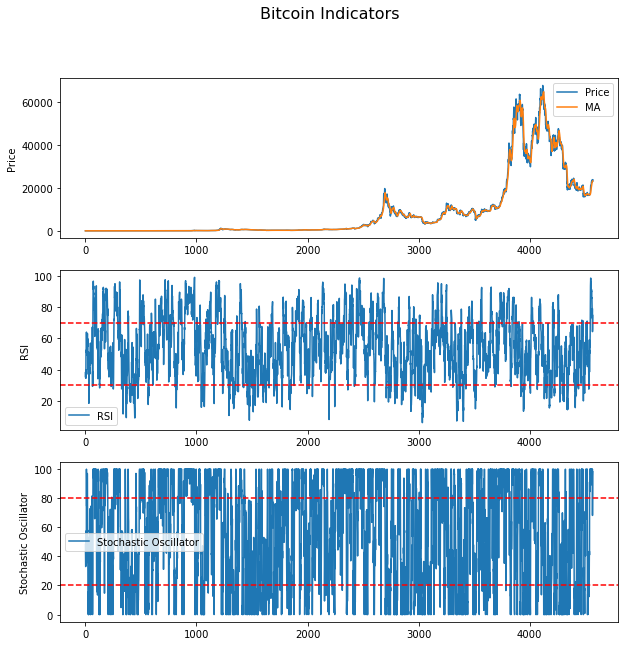

In [38]:
prices = btc['Price']
ma = btc['MA']
rsi = btc['RSI']
so = btc['SO']

# Plot indicators
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Bitcoin Indicators', fontsize=16)

# Moving Average plot
ax1.plot(prices.index, prices, label='Price')
ax1.plot(ma.index, ma, label='MA')
ax1.legend()
ax1.set_ylabel('Price')

# Relative Strength Index plot
ax2.plot(rsi.index, rsi, label='RSI')
ax2.axhline(y=70, color='r', linestyle='--')
ax2.axhline(y=30, color='r', linestyle='--')
ax2.legend()
ax2.set_ylabel('RSI')

# Stochastic Oscillator plot
ax3.plot(so.index, so, label='Stochastic Oscillator')
ax3.axhline(y=80, color='r', linestyle='--')
ax3.axhline(y=20, color='r', linestyle='--')
ax3.legend()
ax3.set_ylabel('Stochastic Oscillator')

plt.show()

1. The top plot shows the Bitcoin price along with the Moving Average (MA) indicator.
2. The middle plot shows the Relative Strength Index (RSI) indicator with two horizontal lines representing the overbought (70) and oversold (30) levels.
3. The bottom plot shows the Stochastic Oscillator (SO) indicator with two lines representing the Stochastic Oscillator, as well as two horizontal lines representing the overbought (80) and oversold (20) levels.

> btc sentiment data is not much findable for dates before 2015

In [27]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# text = 'Bitcoin is soaring to new heights!'
# btc['SA'] = btc.apply(lambda row: sentiment_analysis(row['Text']), axis=1)


> Extrapolating the google trend of 1 month on the whole month

In [28]:
btc_google_trend['time'] = pd.to_datetime(btc_google_trend['time'])
btc_google_trend = btc_google_trend.set_index('time')
btc_google_trend = btc_google_trend.resample('D').interpolate(method='linear')
btc_new = pd.merge(btc, btc_google_trend, on='time', how='outer')

In [29]:
btc = btc_new.dropna()

In [30]:
btc

,time,Price,hash_rate,transaction_volume,mining_difficulty,inflation_rate,year,F_t,MA,RSI,SO,bitcoin_trend
0,2010-07-31,0.067546,2.464401e-03,8.570089e+02,2.442132e+02,0.002842,2010.0,0.006260,0.059978,37.956463,48.174160,0.001000
1,2010-08-01,0.061100,2.901437e-03,4.111534e+03,2.442132e+02,0.003334,2010.0,0.007377,0.060241,34.987151,34.896224,0.001000
2,2010-08-02,0.060000,2.937857e-03,3.789667e+03,2.442132e+02,0.003365,2010.0,0.007441,0.060182,36.744177,33.014453,0.001000
3,2010-08-03,0.060012,2.755758e-03,1.914656e+03,2.442132e+02,0.003146,2010.0,0.006941,0.060729,39.832340,33.056861,0.001000
4,2010-08-04,0.057016,2.949997e-03,8.171519e+02,2.442132e+02,0.003357,2010.0,0.007393,0.061376,34.369832,33.447152,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...
4564,2023-01-28,23008.809465,3.139301e+08,2.115181e+09,3.759045e+13,0.000054,2023.0,75204.256750,22698.923201,73.001478,95.820856,19.387097
4565,2023-01-29,23774.996368,3.114389e+08,2.267370e+09,3.891355e+13,0.000052,2023.0,77851.961773,22969.239496,79.140091,100.000000,19.290323
4566,2023-01-30,22799.427262,2.699481e+08,3.771772e+09,3.935094e+13,0.000045,2023.0,78741.492391,22983.110528,64.339265,68.174069,19.193548
4567,2023-01-31,23130.051913,2.249568e+08,3.561744e+09,3.935094e+13,0.000037,2023.0,78739.077153,23015.798443,66.335655,78.960017,19.096774


In [31]:
gt = btc["bitcoin_trend"]

Text(0, 0.5, 'Price')

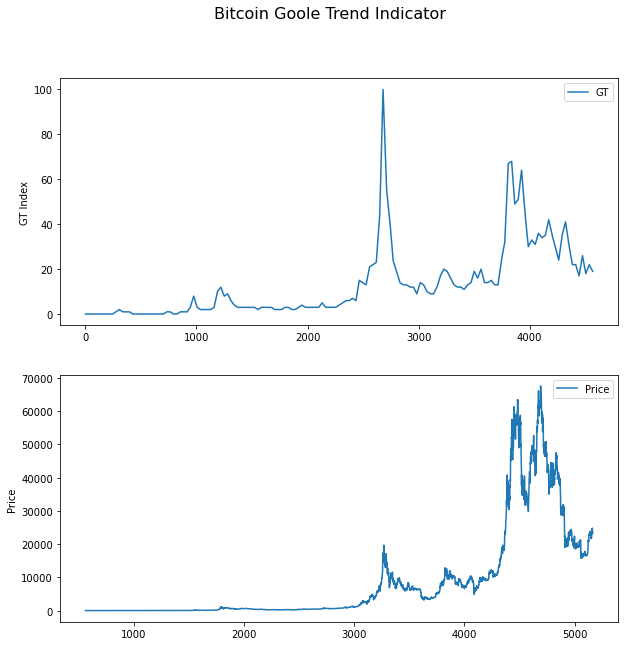

In [32]:
# Plot indicators
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Bitcoin Goole Trend Indicator', fontsize=16)

# Google Trend plot
ax1.plot(gt.index, gt, label='GT')
ax1.legend()
ax1.set_ylabel('GT Index')

# Price plot
ax2.plot(price.index, price, label='Price')
ax2.legend()
ax2.set_ylabel('Price')

13. Calculate the value of each technical indicator and sentiment analysis at time t using the corresponding function $f_j$. For example:


In [33]:
Y1 = alpha1 * ma
Y2 = alpha2 * rsi
Y3 = alpha3 * so
Y3 = alpha4 * gt

14. Calculate the speculative component of Bitcoin prices at time $t$ using the equation for $S_t$:


In [34]:
alpha = [alpha1, alpha2, alpha3, alpha4]
beta = beta

btc.loc[0, 'S_t'] = 0
# Calculate S_t for t > 0
for i in range(1, len(btc)):
    Y = [alpha[j] * y[i] for j, y in enumerate([btc['MA'], btc['RSI'], btc['SO'], btc['bitcoin_trend']])]
    S_t = sum(Y) + beta * btc.loc[i-1, 'S_t']
    btc.loc[i, 'S_t'] = S_t

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


15. Calculate the total price of Bitcoin at time $t$ by adding the fundamental component $F_t$ and the speculative component $S_t$:


In [35]:
btc["P_t"] = btc["F_t"] + btc["S_t"]
btc

/var/folders/gc/m0hv5jzd1kn2nrn5y5w241g00000gn/T/ipykernel_2196/3911963887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["P_t"] = btc["F_t"] + btc["S_t"]


,time,Price,hash_rate,transaction_volume,mining_difficulty,inflation_rate,year,F_t,MA,RSI,SO,bitcoin_trend,S_t,P_t
0,2010-07-31,0.067546,2.464401e-03,8.570089e+02,2.442132e+02,0.002842,2010.0,0.006260,0.059978,37.956463,48.174160,0.001000,0.000000,0.006260
1,2010-08-01,0.061100,2.901437e-03,4.111534e+03,2.442132e+02,0.003334,2010.0,0.007377,0.060241,34.987151,34.896224,0.001000,17.499586,17.506963
2,2010-08-02,0.060000,2.937857e-03,3.789667e+03,2.442132e+02,0.003365,2010.0,0.007441,0.060182,36.744177,33.014453,0.001000,26.400109,26.407550
3,2010-08-03,0.060012,2.755758e-03,1.914656e+03,2.442132e+02,0.003146,2010.0,0.006941,0.060729,39.832340,33.056861,0.001000,31.785520,31.792462
4,2010-08-04,0.057016,2.949997e-03,8.171519e+02,2.442132e+02,0.003357,2010.0,0.007393,0.061376,34.369832,33.447152,0.001000,32.917791,32.925184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,2023-01-28,23008.809465,3.139301e+08,2.115181e+09,3.759045e+13,0.000054,2023.0,75204.256750,22698.923201,73.001478,95.820856,19.387097,18075.890814,93280.147563
4565,2023-01-29,23774.996368,3.114389e+08,2.267370e+09,3.891355e+13,0.000052,2023.0,77851.961773,22969.239496,79.140091,100.000000,19.290323,18271.312265,96123.274037
4566,2023-01-30,22799.427262,2.699481e+08,3.771772e+09,3.935094e+13,0.000045,2023.0,78741.492391,22983.110528,64.339265,68.174069,19.193548,18363.756292,97105.248682
4567,2023-01-31,23130.051913,2.249568e+08,3.561744e+09,3.935094e+13,0.000037,2023.0,78739.077153,23015.798443,66.335655,78.960017,19.096774,18425.799900,97164.877053


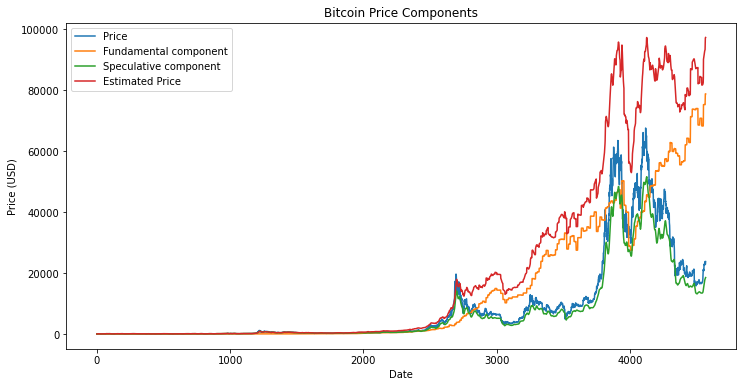

In [36]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Price, Estimated Price (P), Fundamental Component (F_t), and Speculative Component (S)
ax.plot(btc.index, btc['Price'], label='Price')
ax.plot(btc.index, btc['F_t'], label='Fundamental component')
ax.plot(btc.index, btc['S_t'], label='Speculative component')
ax.plot(btc.index, btc['P_t'], label='Estimated Price')

# Set the title and labels for the plot
ax.set_title('Bitcoin Price Components')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

16. Repeat steps 2-14 for each time period $t$ in the dataset.


## Reference
- we use the btc data from: https://coinmetrics.io/community-network-data/, size: 10.3 MB
- we use btc tweets from: https://www.kaggle.com/code/johngiannou/bitcoin-tweets-sentiment-analysis, size: 2.1 GB
- Google trends data https://trends.google.com/trends/explore?date=all&q=bitcoin
- Chat: https://chat.openai.com/chat/ef51b46d-bb76-4913-8461-6334d0ce3c6a